# LLM FINAL ASSESSMENT

In [1]:
import pandas as pd
from google.colab import files

# Upload the file
uploaded = files.upload()

# Load the uploaded file into a DataFrame
df = pd.read_excel('test.xlsx')

# Show the first few rows to confirm
df.head()


Saving test.xlsx to test.xlsx


,Subject,body,date,from
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,2010-05-10,sally.beck@enron.com
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",2010-07-29,eric.bass@enron.com
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",2011-07-25,sally.beck@enron.com
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,2010-03-25,johnny.palmer@enron.com
4,Bet,Since you never gave me the $20 for the last t...,2011-05-21,lydia.delgado@enron.com


## SENTIMENT ANALYSIS

TEXT PREPARATION

Checking for missing values

In [2]:
import pandas as pd

# Check for missing values in Subject and body columns
missing_subject = df['Subject'].isnull().sum()
missing_body = df['body'].isnull().sum()

print(f"Number of missing values in Subject column: {missing_subject}")
print(f"Number of missing values in body column: {missing_body}")

Number of missing values in Subject column: 0
Number of missing values in body column: 0


- Removing special characters, HTML tags, and extra whitespace.
- Normalizing text (lowercase everything).
- Removing stopwords (common but unimportant words like “the”, “and”, etc.).
- Lemmatization (reducing words to root forms like “running” → “run”).


In [3]:
import nltk

# Clear NLTK cache (if anything is broken)
nltk.data.path.clear()

# Force fresh download of all required resources
nltk.download('punkt', force=True)
nltk.download('stopwords', force=True)
nltk.download('wordnet', force=True)
nltk.download('omw-1.4', force=True)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [4]:
# Step 1: Install spaCy and required model
!pip install spacy --quiet
!python -m spacy download en_core_web_sm

# Step 2: Import libraries
import pandas as pd
import re
from bs4 import BeautifulSoup
import spacy

# Load English language model
nlp = spacy.load("en_core_web_sm")

def clean_text(text):
    # Force conversion to string first
    text = str(text)

    # 1. Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()

    # 2. Remove special characters, digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # 3. Convert to lowercase
    text = text.lower()

    # 4. Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # 5. spaCy processing: remove stopwords, lemmatize
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]

    return " ".join(tokens)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 53.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [5]:
df['clean_subject'] = df['Subject'].apply(clean_text)
df['clean_body'] = df['body'].apply(clean_text)


<ipython-input-4-2198910180>:19: MarkupResemblesLocatorWarning: The input passed in on this line looks more like a URL than HTML or XML.

If you meant to use Beautiful Soup to parse the web page found at a certain URL, then something has gone wrong. You should use an Python package like 'requests' to fetch the content behind the URL. Once you have the content as a string, you can feed that string into Beautiful Soup.

However, if you want to parse some data that happens to look like a URL, then nothing has gone wrong: you are using Beautiful Soup correctly, and this warning is spurious and can be filtered. To make this warning go away, run this code before calling the BeautifulSoup constructor:

    from bs4 import MarkupResemblesLocatorWarning
    import warnings

    warnings.filterwarnings("ignore", category=MarkupResemblesLocatorWarning)
    
  text = BeautifulSoup(text, "html.parser").get_text()


In [6]:
df[['Subject', 'clean_subject', 'body', 'clean_body']].head()


,Subject,clean_subject,body,clean_body
0,EnronOptions Update!,enronoption update,EnronOptions Announcement\n\n\nWe have updated...,enronoption announcement update enronoption st...
1,(No Subject),subject,"Marc,\n\nUnfortunately, today is not going to ...",marc unfortunately today go work revenue model...
2,Phone Screen Interview - Shannon L. Burnham,phone screen interview shannon l burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",wednesday june gmt central time canada cst
3,RE: My new work email,new work email,we were thinking papasitos (we can meet somewh...,think papasito meet close time jason bass
4,Bet,bet,Since you never gave me the $20 for the last t...,give time bet cutexas figure chance double sec...


COMBINING SUBJECT AND BODY TEXT FOR FULL CONTEXT OF THE EMAIL

In [7]:
df['full_text'] = df['clean_subject'].fillna('') + ' ' + df['clean_body'].fillna('')
df['full_text'] = df['full_text'].apply(clean_text)


SENTIMENT SCORING USING VADER

I decided to use Vader tool as it is rule-based, fast and reliable, and is great for social texts, emails et. Given the context, TextBlob or Transformers would be either not accurate enough or too resource heavy.

In [8]:
# Installing and importing required libraries
!pip install vaderSentiment --quiet

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.8 MB/s eta 0:00:00


In [9]:
# Initiating the analyzer
analyzer = SentimentIntensityAnalyzer()

In [10]:
# Defining the function to classify sentiment
def get_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.2:
        return 'Positive'
    elif score <= -0.2:
        return 'Negative'
    else:
        return 'Neutral'


# Applying the function to the full_text column
df['sentiment'] = df['full_text'].apply(get_sentiment)

df[['full_text', 'sentiment']].head()


,full_text,sentiment
0,enronoption update enronoption announcement up...,Positive
1,subject marc unfortunately today work revenue ...,Neutral
2,phone screen interview shannon l burnham wedne...,Positive
3,new work email think papasito meet close time ...,Neutral
4,bet time bet cutexas figure chance double seco...,Positive


For the sentiment analysis, I used the VADER tool. The labeling criteria in VADER is as follows:
- Compound Score Range >= 0.2: 'Positive'
- Compound Score Range <= -0.2: 'Negative'
- Compound Score Range between -0.2 and 0.2: 'Neutral'

These cutoff values are chosen for the sentiment analysis as; when doing sentiment analysis on corporate emails from employees, we're working with formal, nuanced, and often emotionally subtle language. Stronger thresholds (±0.2) reduce misclassification of slightly positive/negative emails as overly emotional.

The compound score is a normalized score given to text, calculated using a lexicon of words with known sentiment values and some heuristic rules

# EXPLORATORY DATA ANALYSIS

Examining Data Structure

In [11]:
# Basic structure
print(df.info())
print("\nMissing values:\n", df.isnull().sum())
print("\nSample data:\n", df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Subject        2191 non-null   object        
 1   body           2191 non-null   object        
 2   date           2191 non-null   datetime64[ns]
 3   from           2191 non-null   object        
 4   clean_subject  2191 non-null   object        
 5   clean_body     2191 non-null   object        
 6   full_text      2191 non-null   object        
 7   sentiment      2191 non-null   object        
dtypes: datetime64[ns](1), object(7)
memory usage: 137.1+ KB
None

Missing values:
 Subject          0
body             0
date             0
from             0
clean_subject    0
clean_body       0
full_text        0
sentiment        0
dtype: int64

Sample data:
                                         Subject  \
0                          EnronOptions Update!   
1                 

Sentiment Distribution

<ipython-input-12-2000216669>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='Set2', order=['Positive', 'Neutral', 'Negative'])


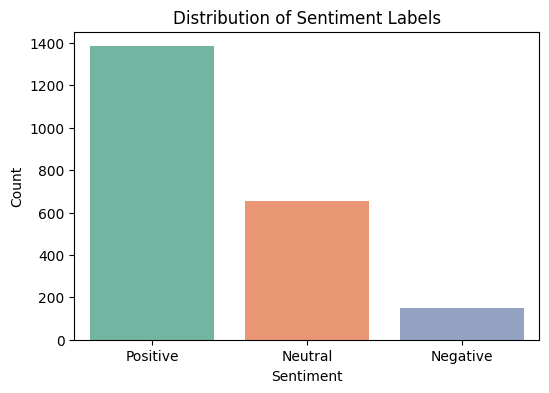


Sentiment Label Percentages:
 sentiment
Positive    63.167503
Neutral     29.940666
Negative     6.891830
Name: proportion, dtype: float64


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of sentiment labels
sentiment_counts = df['sentiment'].value_counts()

# Bar plot
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=df, palette='Set2', order=['Positive', 'Neutral', 'Negative'])
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Percentages
print("\nSentiment Label Percentages:\n", df['sentiment'].value_counts(normalize=True) * 100)


Sentiment Trend Over Time

<ipython-input-13-3702605882>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sentiment = df.groupby([pd.Grouper(key='date', freq='M'), 'sentiment']).size().unstack().fillna(0)


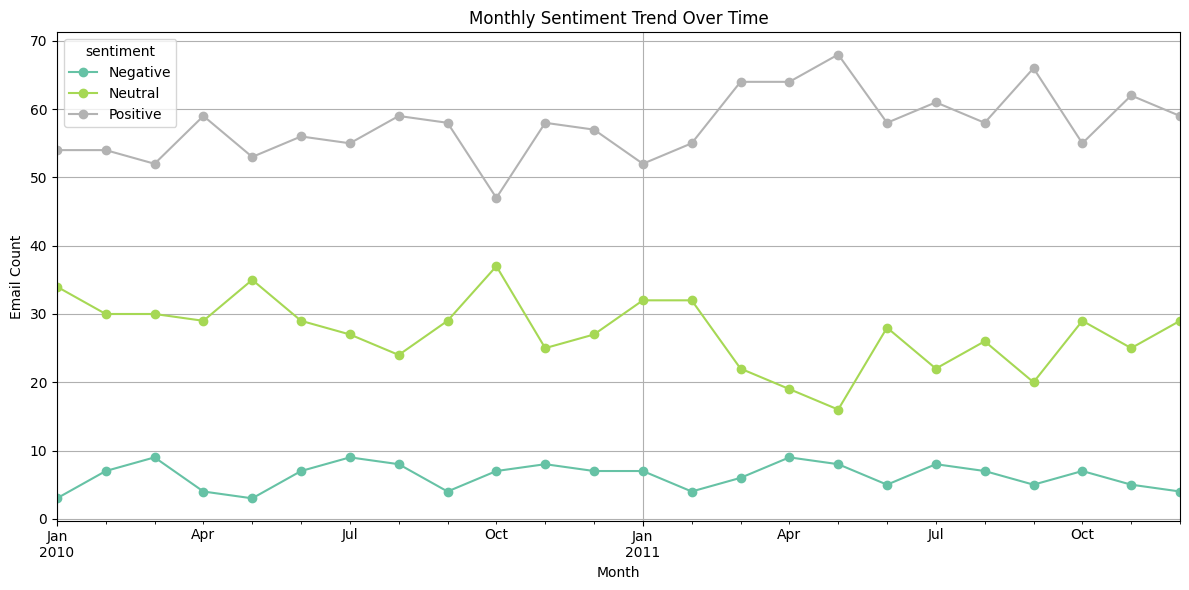

In [13]:
# Ensure 'date_only' is datetime format
df['date'] = pd.to_datetime(df['date'])

# Resample by month and count sentiment occurrences
monthly_sentiment = df.groupby([pd.Grouper(key='date', freq='M'), 'sentiment']).size().unstack().fillna(0)

# Plot
monthly_sentiment.plot(kind='line', marker='o', figsize=(12, 6), colormap='Set2')
plt.title('Monthly Sentiment Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Email Count')
plt.grid(True)
plt.tight_layout()
plt.show()


Sentiments by Sender

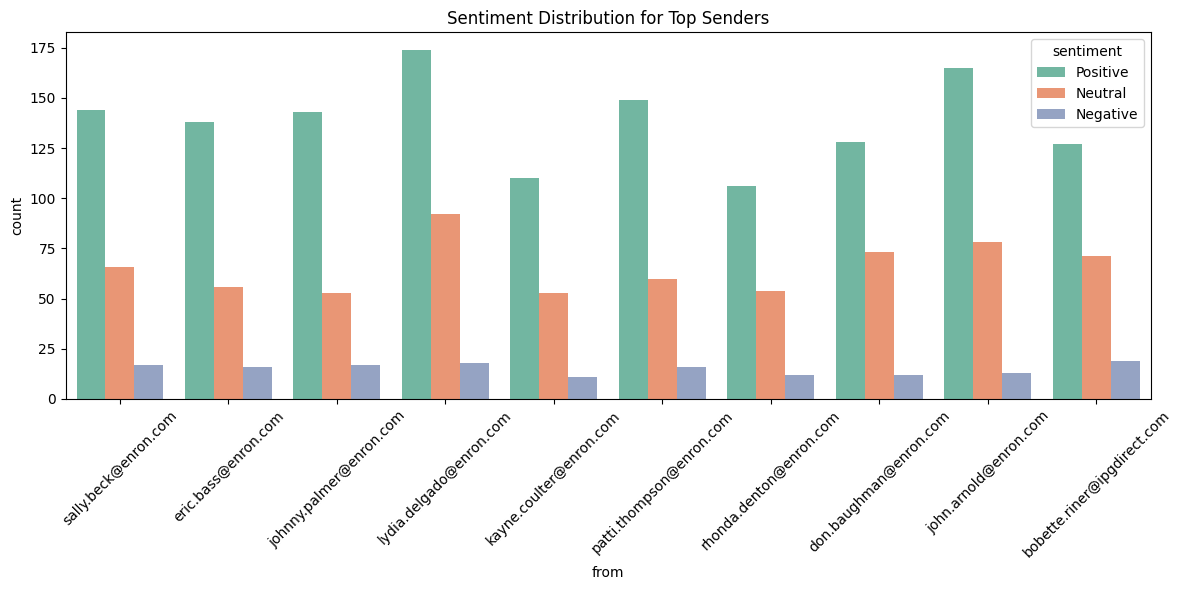

In [14]:
top_senders = df['from'].value_counts().head(10).index
df_top_senders = df[df['from'].isin(top_senders)]

plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_senders, x='from', hue='sentiment', palette='Set2')
plt.title('Sentiment Distribution for Top Senders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Summary Table of Sentiments

In [15]:
summary = df.groupby('sentiment').agg(
    email_count=('sentiment', 'count'),
    avg_subject_length=('clean_subject', lambda x: x.str.len().mean()),
    avg_body_length=('clean_body', lambda x: x.str.len().mean())
)
print(summary)


           email_count  avg_subject_length  avg_body_length
sentiment                                                  
Negative           151           18.033113       144.609272
Neutral            656           14.448171        73.478659
Positive          1384           19.386561       172.768064


Additional Patterns and Insights into Employee Engagement

* **Positive Sentiment Dominates**: Suggests a generally optimistic culture or model bias (e.g., polite closings).
* **Stable Positive Trend**: Positive sentiment remains steady across months.
* **Fluctuating Neutral/Negative Sentiments**: Possible reaction to internal events or pressures.
* **Top Senders = Mostly Positive**: Likely leaders or HR roles maintaining positive tone.
* **Email Length Patterns**:

  * Positive emails → longest subject and body.
  * Neutral emails → shortest, likely factual or procedural.
* **Anomalies**:

  * Spikes in negative/neutral sentiment may indicate specific stress events.
  * Certain senders show higher negative sentiment—worth deeper review.


# EMPLOYEE SCORE CALCULATION

Assigning sentiment scores to each message

In [16]:
sentiment_map = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
df['sentiment_score'] = df['sentiment'].map(sentiment_map)


Calculating aggregate monthly scores and grouping by month

In [17]:
# Converting 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract year-month format for grouping
df['year_month'] = df['date'].dt.to_period('M')


monthly_scores = df.groupby(['from', 'year_month'])['sentiment_score'].sum().reset_index()
monthly_scores.rename(columns={'from': 'employee', 'sentiment_score': 'monthly_sentiment_score'}, inplace=True)



Method Summary for Documentation
Each message is assigned a numeric sentiment score **bold text**:

Positive: +1

Neutral: 0

Negative: –1

Messages are grouped by sender and calendar month (YYYY-MM) using the email date field.

Sentiment scores are aggregated monthly, and scores reset at the start of each new month.

Result: a table with columns: employee, year_month, monthly_sentiment_score.

#EMPLOYEE RANKING

Sorting employee monthly scores to identify the top three positive employees (the three employees with the highest positive scores in a given month) and top three negative employees (The three employees with the lowest (most negative) scores in each month)

In [18]:
# Sort by score descending (positive), then alphabetically
top_positive = (
    monthly_scores.sort_values(by=['year_month', 'monthly_sentiment_score', 'employee'], ascending=[True, False, True])
    .groupby('year_month')
    .head(3)
)

# Sort by score ascending (negative), then alphabetically
top_negative = (
    monthly_scores.sort_values(by=['year_month', 'monthly_sentiment_score', 'employee'], ascending=[True, True, True])
    .groupby('year_month')
    .head(3)
)


In [19]:
# For a specific month like '2011-03':
month = '2011-03'

print("Top Positive Employees –", month)
display(top_positive[top_positive['year_month'] == month])

print("Top Negative Employees –", month)
display(top_negative[top_negative['year_month'] == month])


Top Positive Employees – 2011-03


,employee,year_month,monthly_sentiment_score
182,patti.thompson@enron.com,2011-03,13
206,rhonda.denton@enron.com,2011-03,10
14,bobette.riner@ipgdirect.com,2011-03,7


Top Negative Employees – 2011-03


,employee,year_month,monthly_sentiment_score
110,johnny.palmer@enron.com,2011-03,0
38,don.baughman@enron.com,2011-03,3
62,eric.bass@enron.com,2011-03,3


#FLIGHT RISK IDENTIFICATION

Identifying employees who are at risk of leaving based on their monthly sentiment scores.

Filtering negative emails and sorting and grouping by employees

In [20]:
# Ensuring date is datetime type
df['date'] = pd.to_datetime(df['date'])

# Filter only negative sentiment messages
negative_df = df[df['sentiment'] == 'Negative'][['from', 'date']]

# Sort values for rolling window logic
negative_df = negative_df.sort_values(by=['from', 'date'])


Rolling Count of Negative Messages within 30 Days

In [21]:
from collections import defaultdict

# Dictionary to hold flight risk employees
flight_risk_employees = set()

# Group by employee
for employee, group in negative_df.groupby('from'):
    dates = group['date'].tolist()

    # Use two pointers to find rolling 30-day window with ≥4 negatives
    start = 0
    for end in range(len(dates)):
        while (dates[end] - dates[start]).days > 30:
            start += 1
        if (end - start + 1) >= 4:
            flight_risk_employees.add(employee)
            break  # One occurrence is enough to flag


Outputting the List of Flight Risk Employees

In [22]:
flight_risk_list = sorted(list(flight_risk_employees))
print("🚩 Flight Risk Employees (≥4 negative mails in any 30-day period):")
for emp in flight_risk_list:
    print("-", emp)


🚩 Flight Risk Employees (≥4 negative mails in any 30-day period):
- eric.bass@enron.com
- lydia.delgado@enron.com


#PREDICTIVE MODELING

Creating the following features:
-	Subject Length: The total length of the subject of the mail.
-	Body Length: The total length of the body text of the mail.
-	Word Count: The total word count of the combined text (subject and body text).
-	Average Monthly Messages: The average number of messages sent by a particular user in a month.


In [23]:
import pandas as pd
import numpy as np

# Ensure date column is datetime
df['date'] = pd.to_datetime(df['date'])

# 1. Average message frequency in a month (per sender)
monthly_message_counts = (
    df.groupby(['from', 'year_month']).size()
    .reset_index(name='message_count')
)

# Merge back to original df
df = df.merge(monthly_message_counts, on=['from', 'year_month'], how='left')

# 2. Subject length
df['subject_len'] = df['clean_subject'].fillna('').apply(len)

# 3. Body length
df['body_len'] = df['clean_body'].fillna('').apply(len)

# 4. Word count from full_text
df['word_count'] = df['full_text'].fillna('').apply(lambda x: len(x.split()))


Checking the distribution of the numerical variables

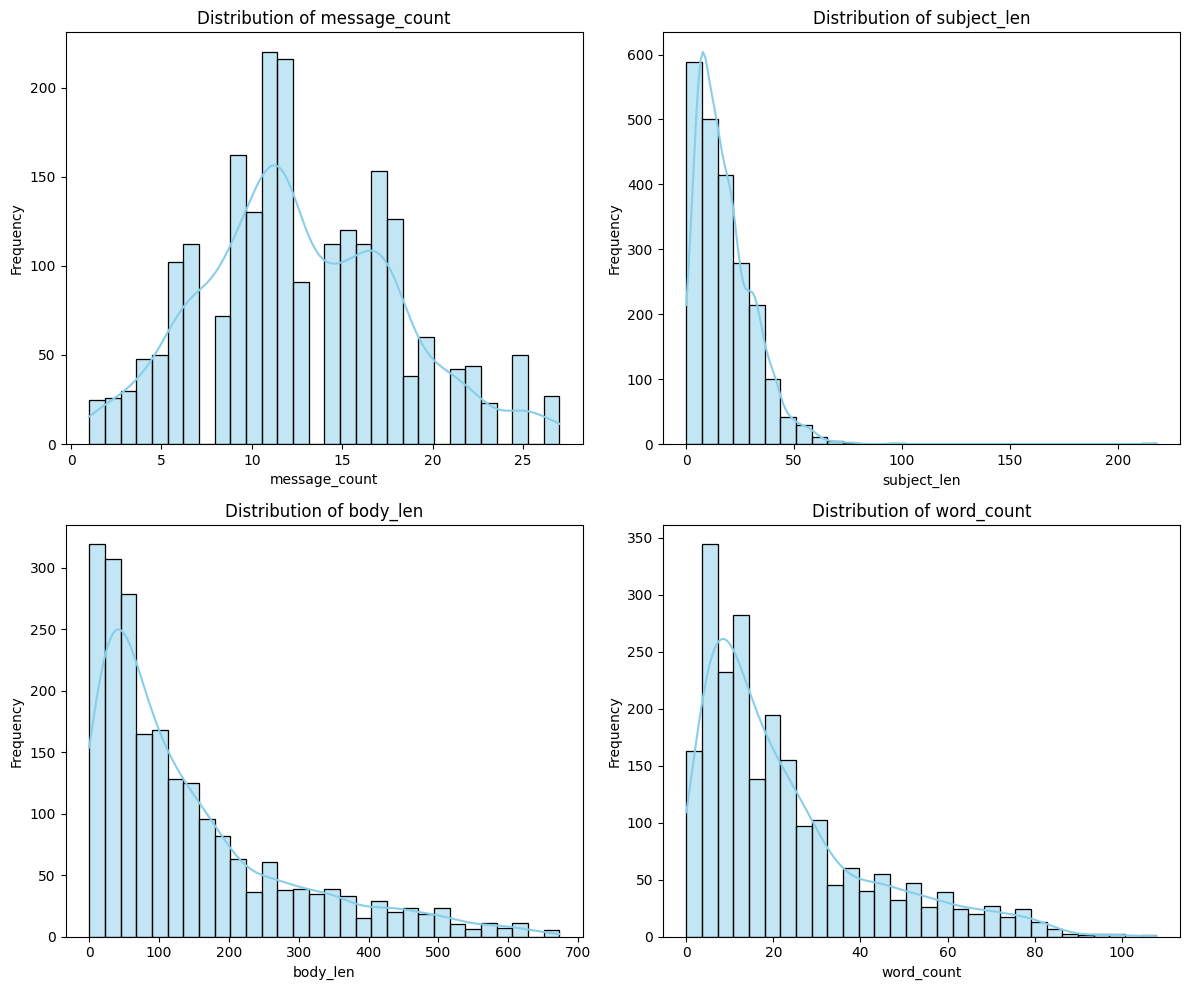

In [24]:
# Define numerical columns
numerical_cols = ['message_count', 'subject_len', 'body_len', 'word_count']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  # Flatten for easy iteration

# Plot histograms with KDE (Kernel Density Estimation)
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], ax=axes[i], kde=True, bins=30, color='skyblue')
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Performing Log-Transformation on the variables that are not normally distributed

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Columns to transform
cols_to_log = ['subject_len', 'body_len', 'word_count']

# Apply log transformation (add 1 to avoid log(0))
for col in cols_to_log:
    df[f'log_{col}'] = np.log1p(df[col])  # log1p = log(x + 1)

Training the linear regression model

In [26]:
!pip install mord  # For ordinal logistic regression
import mord
from sklearn.preprocessing import StandardScaler

# Ensure sentiment_score is properly ordered (-1=Negative, 0=Neutral, 1=Positive)
df['sentiment_score'] = df['sentiment_score'].astype(int)  # Ensure integer type

# Features (scale them for better convergence)
features = ['message_count', 'log_subject_len', 'log_body_len', 'log_word_count']
scaler = StandardScaler()
X = scaler.fit_transform(df[features])
y = df['sentiment_score'].values  # Target must be ordinal integers

  Preparing metadata (setup.py) ... done
  Created wheel for mord: filename=mord-0.7-py3-none-any.whl size=9885 sha256=915f6757064ad2664e3df58cdb99a78612ceb9377e8669be61b66c5abcf429d2
  Stored in directory: /root/.cache/pip/wheels/d1/fc/57/f2a2ad4ed0491ab6d5bb8642a90f1da9469397641e914743da
Successfully built mord


In [27]:
# Initialize and fit the model (LogisticAT is proportional odds model)
ordinal_model = mord.LogisticAT(alpha=0)  # alpha=0 means no regularization
ordinal_model.fit(X, y)

# Predict classes or probabilities
y_pred = ordinal_model.predict(X)  # Predicted class (-1,0,1)
y_proba = ordinal_model.predict_proba(X)  # Class probabilities

from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y, y_pred))
print("\nClassification Report:")
print(classification_report(y, y_pred, target_names=['Negative', 'Neutral', 'Positive']))

# Confusion Matrix
pd.crosstab(y, y_pred, rownames=['Actual'], colnames=['Predicted'])

Accuracy: 0.7047010497489731

Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       151
     Neutral       0.64      0.45      0.53       656
    Positive       0.72      0.90      0.80      1384

    accuracy                           0.70      2191
   macro avg       0.45      0.45      0.44      2191
weighted avg       0.65      0.70      0.66      2191



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Predicted,0,1
Actual,,
-1,30,121
0,292,364
1,132,1252


In [31]:
features = ['message_count', 'log_subject_len', 'log_body_len', 'log_word_count']
X = pd.DataFrame(X, columns=features)  # If X was originally a NumPy array

import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel

# Ensure X has column names
features = ['message_count', 'log_subject_len', 'log_body_len', 'log_word_count']
X = pd.DataFrame(X, columns=features)

# Fit ordinal logistic regression
model = OrderedModel(
    endog=y,
    exog=X,
    distr='logit'
)

result = model.fit(method='bfgs')

# Coefficients and p-values
print("\nCoefficients and p-values:")
print(result.summary())

# Odds Ratios
odds_ratios = np.exp(result.params)
print("\nOdds Ratios:")
print(odds_ratios)

# Thresholds (cut points between sentiment classes)
thresholds = result.params[result.params.index.str.contains('cut')]
print("\nThresholds (cut points):")
print(thresholds)


Optimization terminated successfully.
         Current function value: 0.767554
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22

Coefficients and p-values:
                             OrderedModel Results                             
Dep. Variable:                      y   Log-Likelihood:                -1681.7
Model:                   OrderedModel   AIC:                             3375.
Method:            Maximum Likelihood   BIC:                             3410.
Date:                Mon, 16 Jun 2025                                         
Time:                        13:19:43                                         
No. Observations:                2191                                         
Df Residuals:                    2185                                         
Df Model:                           4                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----